# **_DESARROLLO LABORATORIO 9_**

In [1]:
#Importando librerias necesarias
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import scipy.stats as stats #Para calculo de probabilidades

from sklearn.model_selection import train_test_split #Particionamiento
from sklearn.preprocessing import MinMaxScaler #Utilizar la normalizacion
from sklearn.preprocessing import StandardScaler #Utilizar la estandarizacion 
from sklearn.decomposition import PCA #Para la descomposicion de la varianza en el PCA

In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [4]:
miarchivo="nba_logreg2.csv"
df_arrest=pd.read_csv(miarchivo,sep=";")
df_arrest["TARGET_5Yrs"]=df_arrest["TARGET_5Yrs"].astype('int64')
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

**_1. Estandarizar solo las variables continuas_**

In [10]:
#Separando las variables continuas
continuas = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB'
            ,'DREB','REB','AST','STL','BLK','TOV'
            ]
x = df_arrest.loc[:, continuas].values
#Separando las variable target
y = df_arrest['TARGET_5Yrs'].values

In [12]:
#Particionando los datos
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

**_Estandarizacion (X - Xmean)/(DesvX)_**

In [13]:
#Instanciando un objeto de la clase MinMaxScaler
sc=StandardScaler()
#Aprendiendo y transformando 
xtrain_std=sc.fit_transform(xtrain)

In [14]:
#Ojo: Con lo aprendido de xtrain se debe realizar la transformacion para el Xtest
xtest_std=sc.transform(xtest)

In [15]:
#Creando un nuevo dataframe con los datos estandarizados
df_arrest_std=pd.DataFrame(xtrain_std,columns=continuas)
df_arrest_std.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-0.719662,-0.995681,-1.118599,-1.139285,-0.943118,-2.419002,-0.652122,-0.739133,-1.194836,-0.808896,-0.772801,-1.065002,-0.408200,-0.463069,-0.458849,-0.941404,-1.035153,0.068181,-0.983208
1,-2.848945,-0.842179,-1.005949,-0.906612,-1.134714,2.561225,-0.652122,-0.739133,-1.194836,-1.112395,-0.999118,-3.511972,0.590160,-0.177347,0.153456,-0.802534,-0.556797,0.068181,-0.842078
2,0.143561,-0.440712,-0.487761,-0.441266,-0.477813,0.394503,-0.652122,-0.739133,-1.194836,-0.404230,-0.320169,-0.769842,0.590160,0.108375,0.247657,-0.802534,-0.556797,0.068181,-0.136426
3,-0.489469,-0.606022,-0.915829,-0.906612,-1.079972,1.494033,-0.652122,-0.739133,-1.194836,-0.606563,-0.471046,-0.998353,1.214134,0.036944,0.483159,-0.802534,-0.795975,-0.608780,-1.124338
4,-0.662114,-1.007489,-1.118599,-1.139285,-1.079972,-1.853067,-0.390259,-0.176618,0.133145,-0.808896,-0.772801,-0.503246,-1.032175,-0.963083,-1.071154,0.100121,-0.317618,-0.608780,-0.842078


**_2. Grafico PCA_**

In [22]:
#Instanciando un objeto de la clase PCA
pca=PCA() #Tantos PCA como variables originales
xtrain_pca=pca.fit_transform(xtrain_std)

In [23]:
varianzaexplicada=pca.explained_variance_ratio_
varianzaexplicada

array([5.06237548e-01, 2.04386335e-01, 6.03482329e-02, 4.63957625e-02,
       3.89997749e-02, 3.00314594e-02, 2.65342538e-02, 2.40831740e-02,
       2.22500582e-02, 1.31671650e-02, 1.24505682e-02, 5.52761017e-03,
       5.33545087e-03, 2.80618679e-03, 7.53505411e-04, 4.17559902e-04,
       2.48009128e-04, 1.83875727e-05, 8.95851200e-06])

In [24]:
varianzaacumulada=np.cumsum(varianzaexplicada)
varianzaacumulada

array([0.50623755, 0.71062388, 0.77097212, 0.81736788, 0.85636765,
       0.88639911, 0.91293337, 0.93701654, 0.9592666 , 0.97243376,
       0.98488433, 0.99041194, 0.99574739, 0.99855358, 0.99930708,
       0.99972464, 0.99997265, 0.99999104, 1.        ])

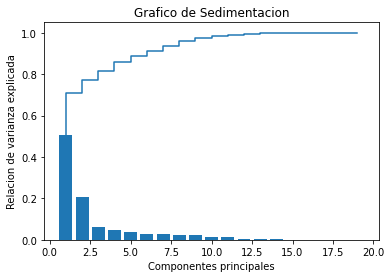

In [26]:
plt.bar(range(1,len(df_arrest_std.columns)+1),varianzaexplicada)
plt.step(range(1,len(df_arrest_std.columns)+1),varianzaacumulada)
plt.ylabel('Relacion de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Grafico de Sedimentacion')
plt.show()

**_3. Kriterio de keiser con la varianza explicada de los 3 primeros componentes_**

In [27]:
#Construyendo la matriz varianza-covarianza
cov_mat=np.cov(xtrain_std.T) #T es la transpuesta

In [28]:
autovalores, autovectores= np.linalg.eig(cov_mat)
print(autovalores)

[9.62886703e+00 3.88752049e+00 1.14785067e+00 8.82468378e-01
 7.41793351e-01 5.71211935e-01 5.04693504e-01 4.58072858e-01
 4.23206166e-01 2.50445431e-01 2.36815437e-01 1.01482688e-01
 1.05137644e-01 5.33749414e-02 1.43320136e-02 7.94217812e-03
 4.71724574e-03 3.49739946e-04 1.70394948e-04]


In [29]:
(autovalores>1).sum()

3

In [30]:
print(sorted(autovalores, reverse=True)) #Para ordenar de mayor a menor

[9.628867026676302, 3.887520493559118, 1.1478506728557742, 0.8824683781411236, 0.7417933510107256, 0.5712119347980711, 0.504693503942002, 0.4580728583326961, 0.4232061658743858, 0.25044543096814414, 0.2368154369967461, 0.10513764444673529, 0.101482687672345, 0.05337494142536764, 0.014332013579656059, 0.007942178120910469, 0.004717245737088714, 0.0003497399456975399, 0.00017039494828880104]


In [32]:
pca=PCA(n_components=3)
x3comp=pca.fit_transform(xtrain_std)
print(x3comp)

[[-3.39152988 -0.8649925  -0.32035074]
 [-2.91035782 -3.29191977 -1.12642946]
 [-1.00792929 -1.97089674  0.05954907]
 ...
 [ 0.20599633 -3.00522598  0.17790079]
 [-2.0766519   1.87580784 -2.03432183]
 [-3.56626731  0.16420025 -0.20608985]]


In [34]:
df_arrest_x=pd.DataFrame(x3comp,columns=['PC1','PC2','PC3'])
df_arrest_x['TARGET_5Yrs']=ytrain
df_arrest_x.head(10)

,PC1,PC2,PC3,TARGET_5Yrs
0,-3.391530,-0.864992,-0.320351,0
1,-2.910358,-3.291920,-1.126429,0
2,-1.007929,-1.970897,0.059549,1
3,-1.918537,-2.614837,-0.269468,0
4,-3.354599,0.922713,0.362722,1
5,-1.726465,2.121716,-1.083185,0
6,0.030791,-2.792813,-0.359632,1
7,-4.168896,-0.926062,-0.169455,1
8,-0.659899,-2.469046,0.034732,1
9,0.788681,-2.029191,-0.268183,1
